In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

/var/folders/p6/zn1thsjj39x22wz5h1vhtxlh0000gn/T/ipykernel_2324/600834044.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('/Users/jeong-yula/Downloads/open/train.csv')

In [3]:
plt.rcParams['font.family'] = 'AppleGothic'

In [4]:
def year_encoder(x):
    output = x.replace('years', '')
    output = output.replace('year', '')
    output = output.replace('+', '')
    output = output.replace('<', '')
    output = output.replace('Unknown', '5').strip()
    output = int(output)

    return output

df['근로기간'] = df['근로기간'].apply(year_encoder)

In [5]:
drop_index = df[df['주택소유상태'] == 'ANY'].index

df = df.drop(drop_index)

In [6]:
def class_encoder(x):
    if x=='A':
        return 6
    elif x=='B':
        return 5
    elif x=='C':
        return 4
    elif x=='D':
        return 3
    elif x=='E':
        return 2
    elif x=='F':
        return 1
    else:
        return 0

df['대출등급']=df['대출등급'].apply(class_encoder)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le= LabelEncoder()
oe=OneHotEncoder()


In [8]:
oe.fit(df[['주택소유상태']])

OneHotEncoder()

In [9]:
oe.transform(df[['주택소유상태']])

<96293x3 sparse matrix of type '<class 'numpy.float64'>'
	with 96293 stored elements in Compressed Sparse Row format>

In [10]:
house_csr=oe.transform(df[['주택소유상태']])
house_csr_df=pd.DataFrame(house_csr.toarray(), columns=oe.get_feature_names_out())
house_csr_df.head()

,주택소유상태_MORTGAGE,주택소유상태_OWN,주택소유상태_RENT
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [11]:
df=pd.concat([df,house_csr_df],axis=1)

In [12]:
oe1=OneHotEncoder()

In [13]:
oe1.fit(df[['대출기간']])

OneHotEncoder()

In [14]:
period_csr=oe1.transform(df[['대출기간']])
period_csr_df=pd.DataFrame(period_csr.toarray(), columns=oe1.get_feature_names_out())
period_csr_df.head()

,대출기간_ 36 months,대출기간_ 60 months,대출기간_nan
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [15]:
df=pd.concat([df,period_csr_df],axis=1)

In [16]:
oe2=OneHotEncoder()

In [17]:
oe2.fit(df[['대출목적']])


OneHotEncoder()

In [18]:
oe2.transform(df[['대출목적']])

<96294x13 sparse matrix of type '<class 'numpy.float64'>'
	with 96294 stored elements in Compressed Sparse Row format>

In [19]:
purpose_csr=oe2.transform(df[['대출목적']])
purpose_csr_df=pd.DataFrame(purpose_csr.toarray(), columns=oe2.get_feature_names_out())
purpose_csr_df.head()

,대출목적_기타,대출목적_부채 통합,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가,대출목적_nan
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
df=pd.concat([df,purpose_csr_df],axis=1)

In [21]:

numeric_cols = ['연간소득', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액','부채_대비_소득_비율']

# 표준편차 사용하여 이상치 제거
def remove_outliers(df, col, threshold=3):
    mean = np.mean(df[col])
    std_dev = np.std(df[col])
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# 이상치 제거 후 데이터프레임 생성
df = df.copy()  # 복사본 생성

for col in numeric_cols:
    df = remove_outliers(df, col, threshold=3)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sd_sc=StandardScaler()
mm_sc=MinMaxScaler()


In [23]:
mm_sc.fit(df[['대출금액','총상환원금','총상환이자']])
df[['대출금액','총상환원금','총상환이자']]=mm_sc.transform(df[['대출금액','총상환원금','총상환이자']])

In [24]:
sd_sc.fit(df[['총연체금액','최근_2년간_연체_횟수','연체계좌수']])
df[['총연체금액','최근_2년간_연체_횟수','연체계좌수']]=sd_sc.transform(df[['총연체금액','최근_2년간_연체_횟수','연체계좌수']])

In [25]:
df1=df.copy()

In [26]:
df1.isnull().sum()

ID                 0
대출금액               0
대출기간               0
근로기간               0
주택소유상태             0
연간소득               0
부채_대비_소득_비율        0
총계좌수               0
대출목적               0
최근_2년간_연체_횟수       0
총상환원금              0
총상환이자              0
총연체금액              0
연체계좌수              0
대출등급               0
주택소유상태_MORTGAGE    1
주택소유상태_OWN         1
주택소유상태_RENT        1
대출기간_ 36 months    0
대출기간_ 60 months    0
대출기간_nan           0
대출목적_기타            0
대출목적_부채 통합         0
대출목적_소규모 사업        0
대출목적_신용 카드         0
대출목적_의료            0
대출목적_이사            0
대출목적_자동차           0
대출목적_재생 에너지        0
대출목적_주요 구매         0
대출목적_주택            0
대출목적_주택 개선         0
대출목적_휴가            0
대출목적_nan           0
dtype: int64

In [27]:
df1=df1.dropna(axis=0)

In [28]:
df1=df1.drop(['ID'],axis=1)

In [29]:
df1=df1.drop(['대출기간'],axis=1)

In [30]:
df1=df1.drop(['주택소유상태'],axis=1)

In [31]:
df1=df1.drop(['대출목적'],axis=1)


In [32]:
df1=df1.drop(['대출기간_nan'],axis=1)

In [33]:
df1=df1.drop(['대출목적_nan'],axis=1)

In [34]:
# feature_columns = list(data.columns.difference(['price'])) # price-target, 그 외 feature
# X = data[feature_columns]
# y = data['price']
# train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# # train/test 비율을 7:3
# print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인

In [35]:
from sklearn.model_selection import train_test_split

X = df1.drop(['대출등급'],axis=1)
y = df1[['대출등급']]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# train/test 비율을 7:3
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인

(63431, 27) (27186, 27) (63431, 1) (27186, 1)


In [36]:
!pip install xgboost
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [37]:
# lightgbm을 구현하여 shap value를 예측할 것
# ligthgbm 구현

# library
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [Info] Number of data points in the train set: 63431, number of used features: 26
[LightGBM] [Info] Start training from score 4.326323


/Users/jeong-yula/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


RMSE: 0.5286663398970016


In [38]:
!pip install shap (에러 발생시, skimage version 확인 (0.14.2 이상 권장))
# import skimage -> skimage.__version__ (skimage version 확인)
# skimage version upgrade -> !pip install --upgrade scikit-image

zsh:1: no matches found: (에러 발생시, skimage version 확인 (0.14.2 이상 권장))


In [39]:
pip install scikit-image


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
import skimage

In [41]:
skimage.__version__

'0.22.0'

In [42]:
!pip install --upgrade scikit-image

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [43]:
pip install shap


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
# shap value 
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산

In [45]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [46]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1,:])

In [47]:
# # 전체 검증 데이터 셋에 대해서 적용
# shap.force_plot(explainer.expected_value, shap_values, test_x) 

Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


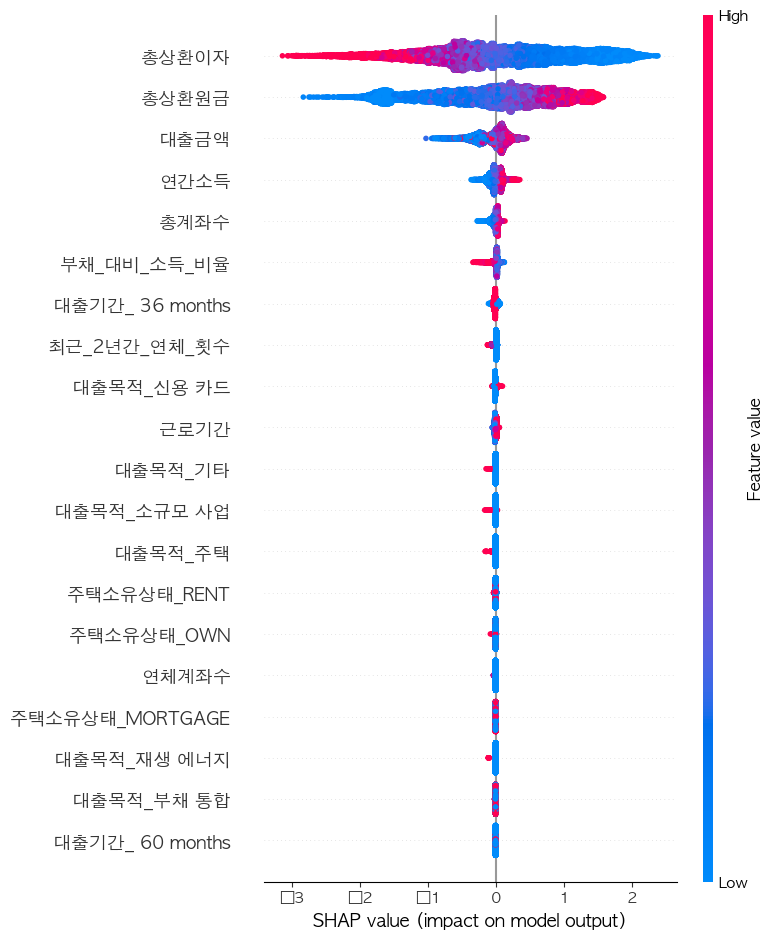

In [48]:
# summary
shap.summary_plot(shap_values, test_x)